In [2]:

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import os
from scipy.stats import rankdata
import sys 
import seaborn as sns
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})


import utilsAnEn
import importlib
from math import erf

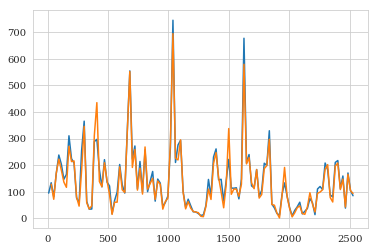

In [5]:
plt.plot(tot['OBS'][:121])
plt.plot(tot['OBS'][122:(121*2)])

## Get all the files:

In [3]:
LeadTime='F048'
tot = utilsAnEn.load_picks([2016,2017,2018],LeadTime)
tot

2016
2017
2018


,Fname,Issued_Time,lead_hr,LT,OBS,Model,Analog0,Analog1,Analog2,Analog3,...,Analog32,Analog33,Analog34,Analog35,Analog36,Analog37,Analog38,Analog39,lat,lon
8,/data/downloaded/Forecasts/Machine_Learning/Re...,2016-12-01,F048,8.0,95.1423,89.4911,58.737499,78.104797,71.093903,92.078400,...,44.987099,76.659401,97.474998,70.639397,76.839897,103.590103,88.859200,92.063904,30.0,243.125
29,/data/downloaded/Forecasts/Machine_Learning/Re...,2016-12-02,F048,8.0,134.1406,125.9952,119.524803,126.626999,79.423302,103.209099,...,107.958000,131.186096,94.171303,93.924301,141.993301,89.904297,99.718002,86.455902,30.0,243.125
50,/data/downloaded/Forecasts/Machine_Learning/Re...,2016-12-03,F048,8.0,81.3112,107.6071,94.133697,66.929398,72.355003,92.897400,...,279.346985,82.014999,79.947403,61.529999,72.819298,131.186096,93.053803,103.590103,30.0,243.125
71,/data/downloaded/Forecasts/Machine_Learning/Re...,2016-12-04,F048,8.0,169.1375,170.4673,186.434601,134.411407,128.814804,129.376999,...,167.692200,154.220795,193.961304,238.639099,192.642700,151.869202,247.166306,98.882103,30.0,243.125
92,/data/downloaded/Forecasts/Machine_Learning/Re...,2016-12-05,F048,8.0,238.3809,285.0808,178.489700,269.724609,326.060394,281.499786,...,208.600998,202.218903,264.322296,161.964096,540.594482,386.334595,126.214104,135.218903,30.0,243.125
113,/data/downloaded/Forecasts/Machine_Learning/Re...,2016-12-06,F048,8.0,203.7800,161.0154,99.234703,214.941696,150.664398,88.076500,...,109.125999,125.812302,79.967499,94.036903,229.828705,184.952103,109.367401,139.977402,30.0,243.125
134,/data/downloaded/Forecasts/Machine_Learning/Re...,2016-12-07,F048,8.0,147.2147,131.4153,137.063400,122.719704,158.056793,98.646698,...,220.506699,70.752403,84.595398,140.411606,145.582596,142.197006,159.249603,89.281303,30.0,243.125
155,/data/downloaded/Forecasts/Machine_Learning/Re...,2016-12-08,F048,8.0,165.6378,187.0126,215.767807,117.075500,182.220901,261.205200,...,121.086800,214.450806,271.443298,116.155403,142.678207,160.182800,186.342300,139.035294,30.0,243.125
176,/data/downloaded/Forecasts/Machine_Learning/Re...,2016-12-09,F048,8.0,310.7746,239.7144,305.421112,190.544907,260.905304,277.287811,...,135.218903,258.104004,210.647003,250.846207,222.722198,191.128494,238.148697,300.734314,30.0,243.125
197,/data/downloaded/Forecasts/Machine_Learning/Re...,2016-12-10,F048,8.0,224.7680,298.3680,269.724609,233.193100,350.586304,390.931091,...,284.360504,223.756607,197.618301,257.023193,261.205200,189.427399,145.230103,255.101807,30.0,243.125


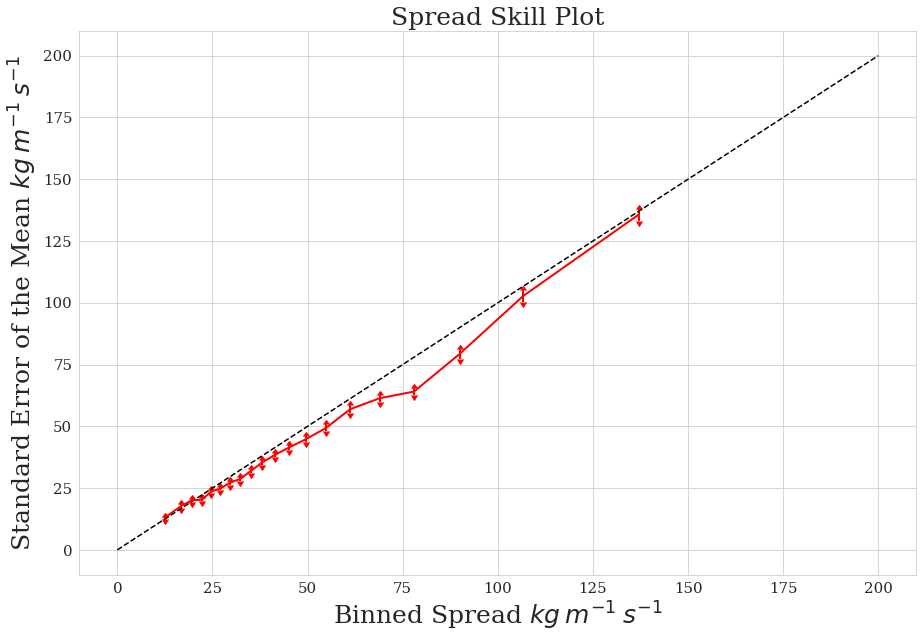

In [130]:
y_tst = np.array(tot['OBS'])
refor = np.array(tot['Model'])

m = np.array(np.mean(tot.filter(regex='Analog'),axis=1))
distPP = np.array(np.std(tot.filter(regex='Analog'),axis=1))

numbins=20

#Calc spread/skill
[avgvar_m,msebin_m,avgvar_s,msebin_s]=utilsutilsAnEn.spreadskill(m,y_tst,distPP,numbins)


#plot
plt.figure(figsize=[15,10])  # inches
plt.errorbar(avgvar_m, (msebin_m), xerr=avgvar_s, yerr=msebin_s, uplims=True, lolims=True,color='r',linewidth=2)
plt.ylabel('Standard Error of the Mean $kg \:  m^{-1} \: s^{-1}$',fontsize=25)
plt.xlabel('Binned Spread $kg \:  m^{-1} \: s^{-1}$',fontsize=25)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Spread Skill Plot',fontsize=25)

plt.plot([0,200],[0,200],'k--')
plt.show()

## Rank Histogram

computing ranks
computing ties
....making figure...


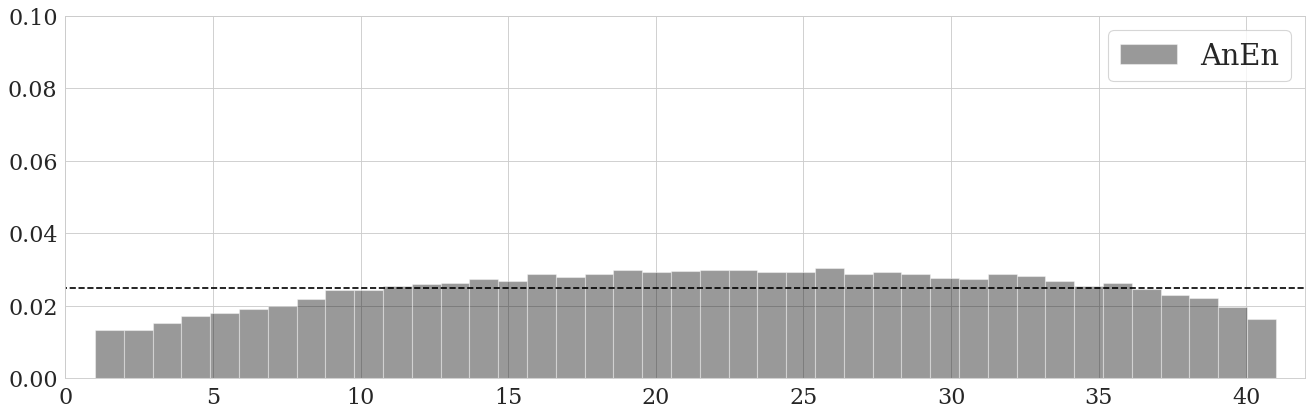

In [139]:
Thresher = 0 #thresh to stratify on. 


sssAl = np.array(tot.filter(regex='Analog'))
rr2 = utilsAnEn.ranker(y_tst[m>Thresher],np.transpose(sssAl[m>Thresher]))


print('....making figure...')

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
# plt.hist(rr,density=True,bins=30,alpha=0.4,label='AnEn')
plt.hist(rr2,density=True,bins=41,alpha=0.4,label='AnEn',color='k')
plt.plot([-10,80],[0.025,0.025],'k--')
plt.legend(fontsize=26)
plt.ylim([0,0.1])
plt.yticks(fontsize=20)
plt.xlim([0,42])
plt.xticks(fontsize=20)

# plt.savefig('/glade/scratch/wchapman/Reforecast/models/RankHist_'+fcast+'_ThreshOBS250_ForecastHour.png',dpi = 300,bbox_inches='tight')
plt.show()

## simple stats

In [132]:
print('AnEn RMSE',utilsAnEn.rmse(m,y_tst))
print('Reforecast RMSE',utilsAnEn.rmse(refor,y_tst))
print('()()()()()()()()()()()()()()()()()()()()()()()')
print('AnEn CRMSE',utilsAnEn.crmse(m,y_tst))
print('Reforecast CRMSE',utilsAnEn.crmse(refor,y_tst))
print('()()()()()()()()()()()()()()()()()()()()()()()')
print('AnEn Bias',utilsAnEn.bias(m,y_tst))
print('Reforecast Bias',utilsAnEn.bias(refor,y_tst))
print('()()()()()()()()()()()()()()()()()()()()()()()')
print('AnEn correlation',utilsAnEn.corrss(m,y_tst))
print('Reforecast correlation',utilsAnEn.corrss(refor,y_tst))

ba=0
for bb in range(len(y_tst)):
    ba += utilsAnEn.crps_TEST(y_tst[bb],m[bb],distPP[bb])
print('()()()()()()()()()()()()()()()()()()()()()()()')
print('CRPS mean:',ba/len(y_tst))

AnEn RMSE 54.947561941849756
Reforecast RMSE 53.992443478522645
()()()()()()()()()()()()()()()()()()()()()()()
AnEn CRMSE 54.73259088523619
Reforecast CRMSE 53.861475588880104
()()()()()()()()()()()()()()()()()()()()()()()
AnEn Bias -4.855724286115986
Reforecast Bias 3.7583773320324383
()()()()()()()()()()()()()()()()()()()()()()()
AnEn correlation 0.9180007034580412
Reforecast correlation 0.9209820773881681
()()()()()()()()()()()()()()()()()()()()()()()
CRPS mean: 24.81520531327506


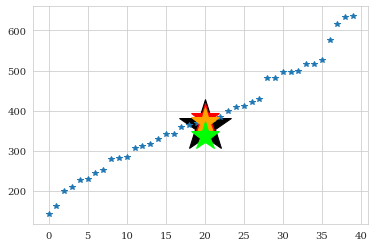

In [137]:
num = 12200
plt.plot(20,(y_tst[num]),'*',color='k',markersize=55)

plt.plot(sorted(sssAl[num,:]),'*')
plt.plot(20,np.mean(sssAl[num,:]),'*',color='red',markersize=30)
plt.plot(20,np.median(sssAl[num,:]),'*',color='orange',markersize=30)
plt.plot(20,np.median(refor[num]),'*',color='lime',markersize=30)

plt.show()

## TEST SHARPNESS --> 